In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics

from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_data = pd.read_csv('CFPB-financial-wellness-data.csv')
df_data.describe()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,...,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,10892.392712,1.279794,2.658899,5.353769,5.362215,5.432280,56.034094,3.048014,3.191899,2.531279,...,0.866124,2.644823,5.145605,0.035815,0.078511,0.129653,0.122928,2.084298,-0.081952,1.000000
std,1967.854493,0.570187,0.656944,1.500913,1.544942,1.613876,14.154676,1.235221,1.114130,1.196235,...,0.340545,1.032583,2.529397,0.185843,0.268995,0.335947,0.328380,0.814345,1.328498,0.585406
min,7123.000000,1.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.165567
25%,9235.250000,1.000000,3.000000,5.000000,5.000000,5.000000,48.000000,2.000000,3.000000,2.000000,...,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.600582
50%,10901.500000,1.000000,3.000000,6.000000,6.000000,6.000000,56.000000,3.000000,3.000000,2.000000,...,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.845213
75%,12570.750000,1.000000,3.000000,6.000000,7.000000,7.000000,65.000000,4.000000,4.000000,3.000000,...,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.251415
max,14400.000000,3.000000,3.000000,7.000000,7.000000,7.000000,95.000000,5.000000,5.000000,5.000000,...,1.000000,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.638674


In [3]:
df_data.describe()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,...,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,10892.392712,1.279794,2.658899,5.353769,5.362215,5.432280,56.034094,3.048014,3.191899,2.531279,...,0.866124,2.644823,5.145605,0.035815,0.078511,0.129653,0.122928,2.084298,-0.081952,1.000000
std,1967.854493,0.570187,0.656944,1.500913,1.544942,1.613876,14.154676,1.235221,1.114130,1.196235,...,0.340545,1.032583,2.529397,0.185843,0.268995,0.335947,0.328380,0.814345,1.328498,0.585406
min,7123.000000,1.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.165567
25%,9235.250000,1.000000,3.000000,5.000000,5.000000,5.000000,48.000000,2.000000,3.000000,2.000000,...,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.600582
50%,10901.500000,1.000000,3.000000,6.000000,6.000000,6.000000,56.000000,3.000000,3.000000,2.000000,...,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.845213
75%,12570.750000,1.000000,3.000000,6.000000,7.000000,7.000000,65.000000,4.000000,4.000000,3.000000,...,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.251415
max,14400.000000,3.000000,3.000000,7.000000,7.000000,7.000000,95.000000,5.000000,5.000000,5.000000,...,1.000000,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.638674


In [4]:
# separating the target from all the features

df_data.dropna(inplace = True)
X = df_data.drop(['PRODUSE_3','PRODUSE_6', 'PUF_ID'], axis = 1)
y = df_data['PRODUSE_3']

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_data.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

<Figure size 864x720 with 0 Axes>

In [6]:
#Correlation with output variable
cor_target = abs(cor["PRODUSE_3"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.15]
relevant_features

fpl              0.169273
KHscore          0.165341
PRODHAVE_1       0.153139
PRODHAVE_4       0.152083
PRODUSE_3        1.000000
PRODUSE_6        0.612998
MATHARDSHIP_1    0.171378
MATHARDSHIP_2    0.159215
PPINCIMP         0.162391
Name: PRODUSE_3, dtype: float64

### Demographic Variable Analysis
#### Non-FWB Related

In [200]:
for i in ['agecat', 'PPEDUC', 'PPETHM', 'PPGENDER', 'LMscore', 'KHscore', 'PRODHAVE_1']:
    dic = {}
    prepaid = df_data[df_data['PRODUSE_3'] == 1][['PRODUSE_3', i]]
    nonprepaid = df_data[df_data['PRODUSE_3'] == 0][['PRODUSE_3', i]]
    a = prepaid.value_counts().sort_index(axis=0, ascending = True)   
    asum = a.sum()
    b = nonprepaid.value_counts().sort_index(axis=0, ascending = True)
    bsum = b.sum()
    average = round(asum / (asum + bsum) * 100, 2) 
    df = pd.concat([a, b])
    
    print('\n')
    print(i)
    print('----------')
    for j in range(len(a)):
        index = a.index[j][1]
        percent = round(a.iloc[j]/ (a.iloc[j] + b.iloc[j]) * 100, 2)
        print(str(index) + ': ' + str(percent) + '%')
    
print('Avereage percent of prepaid card usage: ' + str(average) + '%')



agecat
----------
1: 12.56%
2: 12.01%
3: 10.51%
4: 7.53%
5: 5.93%
6: 6.17%
7: 6.25%
8: 9.51%


PPEDUC
----------
1: 16.08%
2: 11.22%
3: 9.36%
4: 5.49%
5: 5.1%


PPETHM
----------
1: 5.96%
2: 18.54%
3: 8.63%
4: 15.54%


PPGENDER
----------
1: 8.68%
2: 8.84%


LMscore
----------
0: 15.33%
1: 18.92%
2: 11.32%
3: 6.09%


KHscore
----------
-2.053: 4.35%
-1.9: 23.81%
-1.713: 23.62%
-1.485: 18.6%
-1.215: 16.49%
-0.909: 15.97%
-0.57: 10.32%
-0.188: 7.57%
0.242: 5.96%
0.712: 4.19%
1.267: 4.17%


PRODHAVE_1
----------
0: 19.15%
1: 6.96%
Avereage percent of prepaid card usage: 8.76%


#### FWB Related

In [189]:
for i in ['PPINCIMP', 'ENDSMEET', 'REJECTED_1', 'MATHARDSHIP_1']:
    dic = {}
    prepaid = df_data[df_data['PRODUSE_3'] == 1][['PRODUSE_3', i]]
    nonprepaid = df_data[df_data['PRODUSE_3'] == 0][['PRODUSE_3', i]]
    a = prepaid.value_counts().sort_index(axis=0, ascending = True)   
    asum = a.sum()
    b = nonprepaid.value_counts().sort_index(axis=0, ascending = True)
    bsum = b.sum()
    average = round(asum / (asum + bsum) * 100, 2) 
    df = pd.concat([a, b], join = 'inner')
    
    print('\n')
    print(i)
    print('----------')
    for j in range(len(a)):
        if i == 'MATHARDSHIP_1':
            index = a.index[j][1]
            percent = round(a.iloc[j]/ (a.iloc[j] + b.iloc[j+1]) * 100, 2)
            print(str(index) + ': ' + str(percent) + '%')
        else:
            index = a.index[j][1]
            percent = round(a.iloc[j]/ (a.iloc[j] + b.iloc[j]) * 100, 2)
            print(str(index) + ': ' + str(percent) + '%')
    
print('\nAverage percent of prepaid card usage: ' + str(average) + '%')



PPINCIMP
----------
1: 19.19%
2: 15.22%
3: 11.24%
4: 8.78%
5: 8.71%
6: 6.3%
7: 5.97%
8: 5.65%
9: 3.48%


ENDSMEET
----------
-1: 2.27%
1: 5.83%
2: 12.0%
3: 19.83%


REJECTED_1
----------
-1: 5.56%
0: 7.64%
1: 19.0%


MATHARDSHIP_1
----------
1: 6.47%
2: 18.5%
3: 22.15%

Average percent of prepaid card usage: 8.76%


# Test 1: Random Forest

In [7]:
rf_rfe_selector = RFE(estimator=RandomForestClassifier(),n_features_to_select = 20, step = 1)
rf_rfe_selector.fit(X, y) 

RFE(estimator=RandomForestClassifier(), n_features_to_select=20)

In [8]:
rf_feat_columns = X.columns[rf_rfe_selector.get_support()]

In [9]:
X_cat = df_data[rf_feat_columns].drop(columns = ["FWBscore", "KHscore", "SOCSEC3", "CONNECT", "LIFEEXPECT"], errors = "ignore").astype('str')
X_numeric = df_data[["FWBscore", "KHscore", "SOCSEC3", "CONNECT", "LIFEEXPECT"]]

scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_numeric), columns = ["FWBscore", "KHscore", "SOCSEC3", "CONNECT", "LIFEEXPECT"])

features = pd.concat([pd.get_dummies(X_cat), X_num_scaled], axis = 1)
target = df_data['PRODUSE_3']
features

,SWB_3_-1,SWB_3_-4,SWB_3_1,SWB_3_2,SWB_3_3,SWB_3_4,SWB_3_5,SWB_3_6,SWB_3_7,FSscore_-1,...,finalwt_5.30400808744665,finalwt_5.31120828519242,finalwt_5.85306611956764,finalwt_5.8697873155162,finalwt_6.63867414605819,FWBscore,KHscore,SOCSEC3,CONNECT,LIFEEXPECT
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,-0.073062,1.624716,-1.261457,0.347710,-1.814157
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,-0.355677,-0.629626,0.783689,0.788023,0.699088
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,-0.496984,-0.160841,0.843840,-0.532916,0.371274
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,-0.496984,-1.752502,-1.231381,-2.029979,-1.786839
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,-0.496984,-2.261785,0.753613,-2.000625,0.289320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0.350859,1.624716,-1.261457,-0.532916,0.972267
6390,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0.209552,-1.421162,-1.261457,0.934794,0.972267
6391,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0.209552,-1.421162,0.934067,-0.532916,0.972267
6392,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,-0.708944,-1.421162,0.843840,0.611897,-1.213163


<AxesSubplot:>

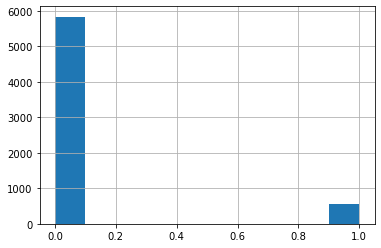

In [10]:
target.hist()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

In [12]:
# Best Params - RandomForestClassifier 
RF = RandomForestClassifier()
search_grid = {'n_estimators': [100, 150, 200]}
search = GridSearchCV(estimator = RF, param_grid = search_grid, scoring = 'f1')


search.fit(X_train, y_train)
print(search.best_params_) 
print(search.best_score_)

{'n_estimators': 100}
0.0


In [13]:
model = RandomForestClassifier(random_state=0, n_estimators=100)
results = model.fit(X_train,y_train)

y_pred_proba = results.predict_proba(X_test)[:,1]
y_pred = [ 0 if x < 0.15 else 1 for x in y_pred_proba]

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1168
           1       0.19      0.23      0.20       111

    accuracy                           0.85      1279
   macro avg       0.56      0.57      0.56      1279
weighted avg       0.86      0.85      0.85      1279



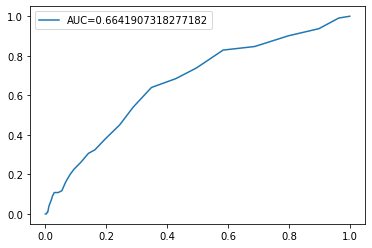

In [14]:
y_pred_proba = results.predict_proba(X_test)[:,1]
fpr, tpr, t = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend()
plt.show()

[[1059  109]
 [  86   25]]


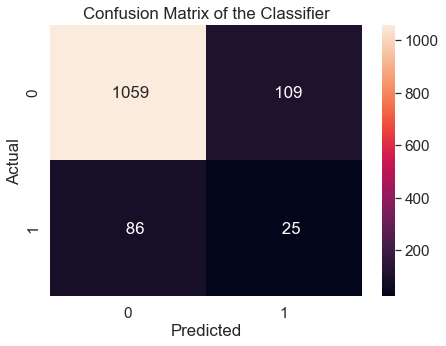

In [15]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'], index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize=(7,5))
sns.heatmap(cf_df, annot=True, fmt='5.0f')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

# Test 2: Logistic Regression


## RFE

In [16]:
# Selecting the Best important features according to Logistic Regression

lr_rfe_selector = RFE(estimator=LogisticRegression(),n_features_to_select = 20, step = 1)
lr_rfe_selector.fit(X, y)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [17]:
lr_feat_columns = X.columns[lr_rfe_selector.get_support()]
X_cat = df_data[lr_feat_columns].astype('str')

features = pd.get_dummies(X_cat)
target = df_data['PRODUSE_3']
features

,FINGOALS_-1,FINGOALS_0,FINGOALS_1,KH1correct_0,KH1correct_1,KH3correct_0,KH3correct_1,HOUSING_-1,HOUSING_1,HOUSING_2,...,INTERCONNECTIONS_4_0,INTERCONNECTIONS_4_1,INTERCONNECTIONS_6_0,INTERCONNECTIONS_6_1,INTERCONNECTIONS_10_0,INTERCONNECTIONS_10_1,EMPLOY1_5_0,EMPLOY1_5_1,EMPLOY1_6_0,EMPLOY1_6_1
0,0,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1,0,1,0,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,0,0,1,0,1,1,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
3,1,0,0,1,0,1,0,1,0,0,...,1,0,1,0,0,1,1,0,1,0
4,0,0,1,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,0,0,1,0,1,0,1,0,1,0,...,1,0,0,1,1,0,1,0,1,0
6390,0,0,1,1,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
6391,0,0,1,1,0,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
6392,0,1,0,1,0,1,0,0,0,1,...,1,0,1,0,0,1,1,0,1,0


In [18]:
target = df_data['PRODUSE_3']
target

0       0
1       0
2       1
3       0
4       0
       ..
6389    0
6390    0
6391    0
6392    0
6393    1
Name: PRODUSE_3, Length: 6394, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

In [22]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# make regression model 
model = sm.Logit(y_train, X_train_scaled)

# fit model and print results
results = model.fit(method='bfgs')
#print(results.summary())

# Predict outcomes
prob_pred = results.predict(X_test_scaled)
#print(prob_pred)

y_pred = [ 0 if x < 0.5725 else 1 for x in prob_pred]
_test = y_test.squeeze()

#Evaluate (Note that these default metrics provide values for y=1)
evaluation_scores = pd.Series({'Model': " Logistic Regression ",
                 'ROC AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'F1 Score': metrics.f1_score(y_test, y_pred)})

print("")
print(evaluation_scores)
print("")

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted prob':prob_pred })
df.head()


print(confusion_matrix(df["Actual"], df["Predicted"]))


confusion_df = pd.DataFrame(confusion_matrix(df["Actual"], df["Predicted"]),
             columns=["Predicted group " + str(cat) for cat in [0,1]],
             index = ["Actual group " + str(cat) for cat in [0,1]])

print(confusion_df.head())
print(" ")
print(" ")
print(classification_report(df["Actual"], df["Predicted"], digits=3))
print(" ")
print(" ")
print("Accuracy score is")
print(round(accuracy_score(df["Actual"], df["Predicted"])* 100, 2),"%")
print(" ")
print(" ")

Optimization terminated successfully.
         Current function value: 0.679372
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14

Model               Logistic Regression 
ROC AUC Score                   0.666188
Precision Score                 0.230769
Recall Score                    0.486486
Accuracy Score                  0.814699
F1 Score                        0.313043
dtype: object

[[988 180]
 [ 57  54]]
                Predicted group 0  Predicted group 1
Actual group 0                988                180
Actual group 1                 57                 54
 
 
              precision    recall  f1-score   support

           0      0.945     0.846     0.893      1168
           1      0.231     0.486     0.313       111

    accuracy                          0.815      1279
   macro avg      0.588     0.666     0.603      1279
weighted avg      0.883     0.815     0.843      1279

 
 
Accuracy score is
81.47 %
 
 


<class 'pandas.core.series.Series'>
<class 'list'>
[[988 180]
 [ 57  54]]


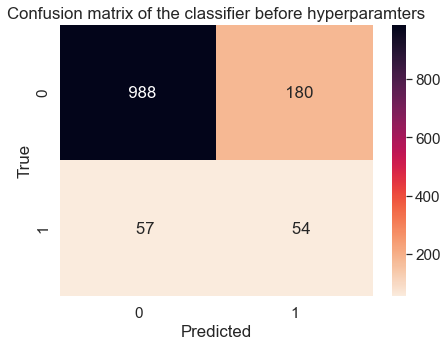

In [23]:
# creating a confusion matrix
print(type(y_test))
print(type(y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize = (7,5))
sns.heatmap(cf_df, annot=True,fmt='5.0f',cmap='rocket_r')
plt.title('Confusion matrix of the classifier before hyperparamters')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

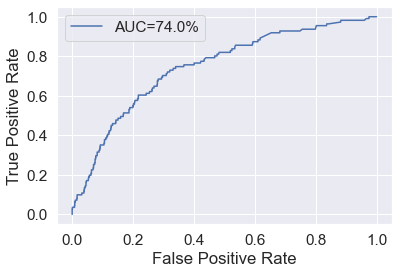

In [24]:
# creating AUC Curve

fpr, tpr, t= metrics.roc_curve(y_test, prob_pred)
auc = metrics.roc_auc_score(y_test,prob_pred)
plt.plot(fpr,tpr,label="AUC="+str(100*round(auc,2))+"%")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### KBest

In [25]:
selector = SelectKBest(f_classif, k = 20)

X_0 = selector.fit_transform(X, y)

X_f = pd.DataFrame(X_0, columns = X.columns[selector.get_support()])
#X_test_f = pd.DataFrame(test_data, columns = X_train.columns[selector.get_support()])

test2_features = X.columns[selector.get_support()]

In [26]:
X_cat = df_data[test2_features].drop(columns = ["FWBscore", "KHscore", "LMscore", "CONNECT"], errors = "ignore").astype('str')
X_numeric = df_data[["FWBscore", "KHscore", "LMscore", "CONNECT"]]

features = pd.concat([pd.get_dummies(X_cat), X_numeric], axis = 1)
target = df_data['PRODUSE_3']
features

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# make regression model 
model = sm.Logit(y_train, X_train_scaled)

# fit model and print results
results = model.fit()
#print(results.summary())

# Predict outcomes
prob_pred = results.predict(X_test_scaled)
#print(prob_pred)

y_pred = [ 0 if x < 0.55 else 1 for x in prob_pred]
_test = y_test.squeeze()

#Evaluate (Note that these default metrics provide values for y=1)
evaluation_scores = pd.Series({'Model': " Logistic Regression ",
                 'ROC AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'F1 Score': metrics.f1_score(y_test, y_pred)})

print("")
print(evaluation_scores)
print("")

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted prob':prob_pred })
df.head()


print(confusion_matrix(df["Actual"], df["Predicted"]))


confusion_df = pd.DataFrame(confusion_matrix(df["Actual"], df["Predicted"]),
             columns=["Predicted group " + str(cat) for cat in [0,1]],
             index = ["Actual group " + str(cat) for cat in [0,1]])

print(confusion_df.head())
print(" ")
print(" ")
print(classification_report(df["Actual"], df["Predicted"], digits=3))
print(" ")
print(" ")
print("Accuracy score is")
print(round(accuracy_score(df["Actual"], df["Predicted"])* 100, 2),"%")
print(" ")
print(" ")

         Current function value: 0.679226
         Iterations: 35

Model               Logistic Regression 
ROC AUC Score                   0.643296
Precision Score                 0.183946
Recall Score                    0.495495
Accuracy Score                  0.765442
F1 Score                        0.268293
dtype: object

[[924 244]
 [ 56  55]]
                Predicted group 0  Predicted group 1
Actual group 0                924                244
Actual group 1                 56                 55
 
 
              precision    recall  f1-score   support

           0      0.943     0.791     0.860      1168
           1      0.184     0.495     0.268       111

    accuracy                          0.765      1279
   macro avg      0.563     0.643     0.564      1279
weighted avg      0.877     0.765     0.809      1279

 
 
Accuracy score is
76.54 %
 
 


<class 'pandas.core.series.Series'>
<class 'list'>
[[924 244]
 [ 56  55]]


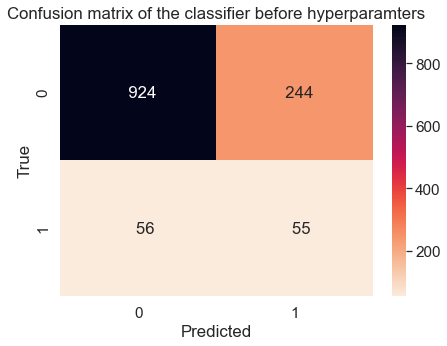

In [28]:
# creating a confusion matrix
print(type(y_test))
print(type(y_pred))
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize = (7,5))
sns.heatmap(cf_df, annot=True,fmt='5.0f',cmap='rocket_r')
plt.title('Confusion matrix of the classifier before hyperparamters')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

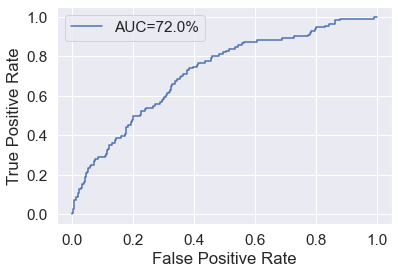

In [29]:
# creating AUC Curve

fpr, tpr, t= metrics.roc_curve(y_test, prob_pred)
auc = metrics.roc_auc_score(y_test,prob_pred)
plt.plot(fpr,tpr,label="AUC="+str(100*round(auc,2))+"%")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Test 3 AdaBoost


In [30]:
ada_rfe_selector = RFE(estimator=AdaBoostClassifier(),n_features_to_select = 20, step = 1)
ada_rfe_selector.fit(X, y)
ada_features = X.columns[ada_rfe_selector.get_support()]

In [31]:
ada_features

Index(['ACT1_1', 'FINGOALS', 'FRUGALITY', 'SUBNUMERACY1', 'KHKNOWL1',
       'KHKNOWL3', 'HOUSING', 'VALUERANGES', 'MORTGAGE', 'PRODHAVE_4',
       'MATHARDSHIP_1', 'MATERIALISM_2', 'CONNECT', 'DISCOUNT',
       'INTERCONNECTIONS_4', 'SOCSEC3', 'LIFEEXPECT', 'PPETHM', 'PPREG9',
       'finalwt'],
      dtype='object')

In [32]:
X_cat = X[ada_features].drop(columns = ["FWBscore", "SOCSEC3", "LIFEEXPECT", "CONNECT"], errors = "ignore").astype('str')
X_numeric = df_data[["FWBscore", "SOCSEC3", "LIFEEXPECT", "CONNECT"]]

features = pd.concat([pd.get_dummies(X_cat), X_numeric], axis = 1)
target = df_data['PRODUSE_3']
features

,ACT1_1_-1,ACT1_1_1,ACT1_1_2,ACT1_1_3,ACT1_1_4,ACT1_1_5,FINGOALS_-1,FINGOALS_0,FINGOALS_1,FRUGALITY_-1,...,finalwt_5.18477594585938,finalwt_5.30400808744665,finalwt_5.31120828519242,finalwt_5.85306611956764,finalwt_5.8697873155162,finalwt_6.63867414605819,FWBscore,SOCSEC3,LIFEEXPECT,CONNECT
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,55,-2,-2,80
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,51,66,90,95
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,49,68,78,50
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,49,-1,-1,-1
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,49,65,75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,61,-2,100,50
6390,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,59,-2,100,100
6391,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,59,71,100,50
6392,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,46,68,20,89


In [33]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:

# Best Params - AdaBoostClassifier 
ada= AdaBoostClassifier()
search_grid = {'n_estimators': [100, 150, 200]}
search = GridSearchCV(estimator = ada, param_grid = search_grid, scoring = 'f1')

search.fit(X_train_scaled, y_train)
print(search.best_params_) 
print(search.best_score_)

{'n_estimators': 200}
0.06782194322774746


              precision    recall  f1-score   support

           0       0.94      0.75      0.84      1168
           1       0.17      0.53      0.26       111

    accuracy                           0.73      1279
   macro avg       0.56      0.64      0.55      1279
weighted avg       0.88      0.73      0.79      1279



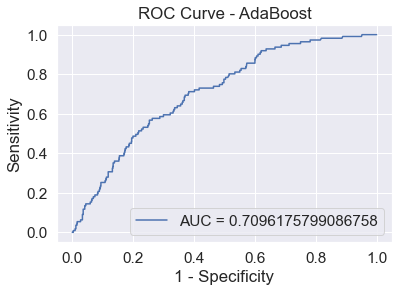

In [36]:
model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 100, learning_rate = 1)
model.fit(X_train_scaled, y_train)

y_test_prob = model.predict_proba(X_test_scaled)[:,1]
y_test_pred = [(x > .494) for x in y_test_prob]

print(classification_report(y_test, y_test_pred))

from sklearn.metrics import roc_auc_score, roc_curve

fp, tp, t = roc_curve(y_test, y_test_prob)
auc = roc_auc_score(y_test, y_test_prob)
plt.plot(fp, tp, label = "AUC = " + str(auc))
plt.title("ROC Curve - AdaBoost")
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.legend()
plt.show()

[[924 244]
 [ 56  55]]


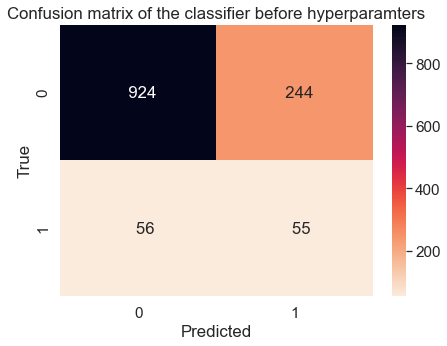

In [37]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

cf_df = pd.DataFrame(cnf_matrix,columns=['0','1'],index=['0','1'])
sns.set(font_scale=1.4)
plt.figure(figsize = (7,5))
sns.heatmap(cf_df, annot=True,fmt='5.0f',cmap='rocket_r')
plt.title('Confusion matrix of the classifier before hyperparamters')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

# Testing Metrics w/ Varying Number of Features and Thresholds

## Random Forest

### Number of Features

In [39]:
for i in range(5,21,5):
    
    rfe_test = RFE(estimator=RandomForestClassifier(),n_features_to_select = i, step = 1)
    rfe_test.fit(X, y)
    
    features = df_data[X.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = RandomForestClassifier(random_state=0, n_estimators=100)

    # fit model and print results
    results = model.fit(X_train_scaled, y_train)

    # Predict outcomes
    y_pred_proba = results.predict_proba(X_test_scaled)[:,1]

    y_pred = [ 0 if x < .15 else 1 for x in y_pred_proba]

    #Evaluate (Note that these default metrics provide values for y=1)
    print('Number of Features =', i)
    print('--------------------------')
    print(classification_report(y_test, y_pred))

Number of Features = 5
--------------------------
              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1168
           1       0.12      0.37      0.18       111

    accuracy                           0.71      1279
   macro avg       0.52      0.56      0.50      1279
weighted avg       0.86      0.71      0.77      1279

Number of Features = 10
--------------------------
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1168
           1       0.15      0.44      0.22       111

    accuracy                           0.73      1279
   macro avg       0.54      0.60      0.53      1279
weighted avg       0.87      0.73      0.78      1279

Number of Features = 15
--------------------------
              precision    recall  f1-score   support

           0       0.94      0.77      0.85      1168
           1       0.17      0.49      0.25       111

    accuracy                  

### Threshold

In [41]:
for i in [.135, .14, .145, .15, .155]:

    features = df_data[X.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = RandomForestClassifier(random_state=0, n_estimators=100)

    # fit model and print results
    results = model.fit(X_train_scaled, y_train)

    # Predict outcomes
    y_pred_proba = results.predict_proba(X_test_scaled)[:,1]

    y_pred = [ 0 if x < i else 1 for x in y_pred_proba]

    #Evaluate (Note that these default metrics provide values for y=1)
    print('threshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))

threshold = 0.135
------------------
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1168
           1       0.16      0.55      0.25       111

    accuracy                           0.71      1279
   macro avg       0.55      0.64      0.53      1279
weighted avg       0.88      0.71      0.77      1279

threshold = 0.14
------------------
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1168
           1       0.16      0.55      0.25       111

    accuracy                           0.71      1279
   macro avg       0.55      0.64      0.53      1279
weighted avg       0.88      0.71      0.77      1279

threshold = 0.145
------------------
              precision    recall  f1-score   support

           0       0.94      0.75      0.84      1168
           1       0.17      0.53      0.26       111

    accuracy                           0.73      1279
   macro avg      

## Logistic Regression (RFE)

### Number of Features

In [42]:
for i in range(5,21,5):
    
    rfe_test = RFE(estimator=LogisticRegression(), n_features_to_select = i, step = 1)
    rfe_test.fit(X, y)
    
    features = df_data[X.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = sm.Logit(y_train, X_train_scaled)

    # fit model and print results
    results = model.fit()
    #print(results.summary())

    # Predict outcomes
    prob_pred = results.predict(X_test_scaled)
    #print(prob_pred)

    y_pred = [ 0 if x < 0.5 else 1 for x in prob_pred]
    _test = y_test.squeeze()

    #Evaluate (Note that these default metrics provide values for y=1)
    print('threshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.684496
         Iterations 4
threshold = 5
------------------
              precision    recall  f1-score   support

           0       0.95      0.66      0.78      1168
           1       0.15      0.64      0.25       111

    accuracy                           0.66      1279
   macro avg       0.55      0.65      0.51      1279
weighted avg       0.88      0.66      0.73      1279

Optimization terminated successfully.
         Current function value: 0.681672
         Iterations 4
threshold = 10
------------------
              precision    recall  f1-score   support

           0       0.96      0.57      0.71      1168
           1       0.15      0.77      0.24       111

    accuracy                           0.58      1279
   macro avg       0.55      0.67      0.48      1279
weighted avg       0.89      0.58      0.67      1279

Optimization terminated successfully.
         Current function value: 0.68

### Threshold

In [43]:
for i in [.57, .5725, .575, .5775]:
 
    features = df_data[X.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = sm.Logit(y_train, X_train_scaled)

    # fit model and print results
    results = model.fit()
    #print(results.summary())

    # Predict outcomes
    prob_pred = results.predict(X_test_scaled)
    #print(prob_pred)

    y_pred = [ 0 if x < i else 1 for x in prob_pred]
    _test = y_test.squeeze()

    #Evaluate (Note that these default metrics provide values for y=1)
    print('\nthreshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.679686
         Iterations 4

threshold = 0.57
------------------
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1168
           1       0.23      0.50      0.31       111

    accuracy                           0.81      1279
   macro avg       0.59      0.67      0.60      1279
weighted avg       0.88      0.81      0.84      1279

Optimization terminated successfully.
         Current function value: 0.679686
         Iterations 4

threshold = 0.5725
------------------
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      1168
           1       0.24      0.49      0.32       111

    accuracy                           0.82      1279
   macro avg       0.59      0.67      0.61      1279
weighted avg       0.88      0.82      0.85      1279

Optimization terminated successfully.
         Current function va

## Logistic Regression (KBest)

### Number of Features

In [44]:
for i in range(5,21,5):
    selector = SelectKBest(f_classif, k = i)

    X_0 = selector.fit_transform(X, y)

    X_f = pd.DataFrame(X_0, columns = X.columns[selector.get_support()])
    #X_test_f = pd.DataFrame(test_data, columns = X_train.columns[selector.get_support()])

    test2_features = X.columns[selector.get_support()]

    features = df_data[test2_features]
    target = df_data['PRODUSE_3']
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # make regression model 
    model = sm.Logit(y_train, X_train_scaled)

    # fit model and print results
    results = model.fit()
    #print(results.summary())

    # Predict outcomes
    prob_pred = results.predict(X_test_scaled)
    #print(prob_pred)

    y_pred = [ 0 if x < 0.5 else 1 for x in prob_pred]
    _test = y_test.squeeze()

    #Evaluate (Note that these default metrics provide values for y=1)
    print('\nthreshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))


Optimization terminated successfully.
         Current function value: 0.684510
         Iterations 4

threshold = 5
------------------
              precision    recall  f1-score   support

           0       0.95      0.64      0.76      1168
           1       0.14      0.63      0.23       111

    accuracy                           0.64      1279
   macro avg       0.54      0.63      0.50      1279
weighted avg       0.88      0.64      0.72      1279

Optimization terminated successfully.
         Current function value: 0.682236
         Iterations 4

threshold = 10
------------------
              precision    recall  f1-score   support

           0       0.95      0.63      0.76      1168
           1       0.14      0.65      0.24       111

    accuracy                           0.64      1279
   macro avg       0.55      0.64      0.50      1279
weighted avg       0.88      0.64      0.72      1279

Optimization terminated successfully.
         Current function value: 0.

### Threshold

In [45]:
for i in [.53, .54, .55, .56, .57]:
    selector = SelectKBest(f_classif, k = 20)

    X_0 = selector.fit_transform(X, y)

    X_f = pd.DataFrame(X_0, columns = X.columns[selector.get_support()])
    #X_test_f = pd.DataFrame(test_data, columns = X_train.columns[selector.get_support()])

    test2_features = X.columns[selector.get_support()]

    features = df_data[test2_features]
    target = df_data['PRODUSE_3']
    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # make regression model 
    model = sm.Logit(y_train, X_train_scaled)

    # fit model and print results
    results = model.fit()
    #print(results.summary())

    # Predict outcomes
    prob_pred = results.predict(X_test_scaled)
    #print(prob_pred)

    y_pred = [ 0 if x < i else 1 for x in prob_pred]
    _test = y_test.squeeze()

    #Evaluate (Note that these default metrics provide values for y=1)
    print('\nthreshold =', i)
    print('------------------')
    print(classification_report(y_test, y_pred))

Optimization terminated successfully.
         Current function value: 0.680333
         Iterations 4

threshold = 0.53
------------------
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1168
           1       0.18      0.58      0.27       111

    accuracy                           0.73      1279
   macro avg       0.56      0.66      0.56      1279
weighted avg       0.88      0.73      0.79      1279

Optimization terminated successfully.
         Current function value: 0.680333
         Iterations 4

threshold = 0.54
------------------
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1168
           1       0.19      0.55      0.28       111

    accuracy                           0.75      1279
   macro avg       0.57      0.66      0.57      1279
weighted avg       0.88      0.75      0.80      1279

Optimization terminated successfully.
         Current function valu

## LDA

### Number of Features

In [50]:
for i in range(5,21,5):
    rfe_test = RFE(estimator=AdaBoostClassifier(),n_features_to_select = i, step = 1)
    rfe_test.fit(X, y)
    features = df_data[X.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 100, learning_rate = 1)
    #model.fit(X_train_scaled, y_train_scaled)

    # fit model and print results
    results = model.fit(X_traine_scaled, y_train)
    #print(results.summary())

    # Predict outcomes
    y_test_prob= results.predict_proba(X_test_scaled)[:,1]
    y_test_pred = [(x > .494) for x in y_test_prob]
    
    #Evaluate (Note that these default metrics provide values for y=1)
    print('Number of Features =', i)
    print('-----------------------------')
    print(classification_report(y_test, y_test_pred))

#ValueError: X has 5 features, but DecisionTreeClassifier is expecting 20 features as input.

   

Number of Features = 5
-----------------------------
              precision    recall  f1-score   support

           0       0.94      0.69      0.80      1168
           1       0.15      0.56      0.23       111

    accuracy                           0.68      1279
   macro avg       0.54      0.62      0.51      1279
weighted avg       0.87      0.68      0.75      1279



ValueError: X has 5 features, but DecisionTreeClassifier is expecting 10 features as input.

### Threshold

In [49]:
for i in [.49, .492, .494, .496]:

    features = df_data[X.columns[rfe_test.get_support()]]
    target = df_data['PRODUSE_3']

    X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # make regression model 
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 100, learning_rate = 1)
    #model.fit(X_train_scaled, y_train_scaled)

    # fit model and print results
    results = model.fit(X_train_scaled, y_train)
    #print(results.summary())

    # Predict outcomes
    y_test_prob = results.predict_proba(X_test_scaled)[:,1]
    y_test_pred = [(x > i) for x in y_test_prob]
    
    #Evaluate (Note that these default metrics provide values for y=1)
    print('threshold =', i)
    print('------------------')
    print(classification_report(y_test, y_test_pred))


   

threshold = 0.49
------------------
              precision    recall  f1-score   support

           0       0.96      0.04      0.08      1168
           1       0.09      0.98      0.16       111

    accuracy                           0.12      1279
   macro avg       0.52      0.51      0.12      1279
weighted avg       0.88      0.12      0.08      1279

threshold = 0.492
------------------
              precision    recall  f1-score   support

           0       0.96      0.35      0.51      1168
           1       0.11      0.84      0.19       111

    accuracy                           0.39      1279
   macro avg       0.53      0.59      0.35      1279
weighted avg       0.88      0.39      0.48      1279

threshold = 0.494
------------------
              precision    recall  f1-score   support

           0       0.94      0.69      0.80      1168
           1       0.15      0.56      0.23       111

    accuracy                           0.68      1279
   macro avg      

In [ ]:
import warnings
warnings.filterwarnings('ignore')
for i in range(5,21,5):
    rfe_test = RFE(estimator=LogisticRegression(), n_features_to_select = i)
    rfe_test.fit(X, y)

In [ ]:
ada_rfe_selector = RFE(estimator=AdaBoostClassifier(),n_features_to_select = 20, step = 100)
ada_rfe_selector.fit(full_features, y)
ada_features = full_features.columns[ada_rfe_selector.get_support()]
target = y
features = full_features[ada_features]
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0, test_size = 0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Best Params - AdaBoostClassifier 
ada= AdaBoostClassifier()
search_grid = {'n_estimators': [100, 150, 200]}
search = GridSearchCV(estimator = ada, param_grid = search_grid, scoring = 'f1')

search.fit(X_train_scaled, y_train)
print(search.best_params_) 
print(search.best_score_)

model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 100, learning_rate = 1)
model.fit(X_train_scaled, y_train)

y_test_prob = results.predict(X_test_scaled)
print(y_test_prob)

y_test_ppred = search.best_estimator_.predict_proba(X_test_scaled)[:,1]
y_test_pred = [(x > .494) for x in y_test_ppred]

print(classification_report(y_test, y_test_pred))

from sklearn.metrics import roc_auc_score, roc_curve

fp, tp, t = roc_curve(y_test, y_test_ppred)
auc = roc_auc_score(y_test, y_test_ppred)
plt.plot(fp, tp, label = "AUC = " + str(auc))
plt.title("ROC Curve - AdaBoost")
plt.xlabel("1 - Specificity")
plt.ylabel("Sensitivity")
plt.legend()
plt.show()